In [1]:
# Choose the number k clusters
# Select at random K points, the cetnroids (not necessarily from your dataset)
# Assign each data point to the closest centroid --> That forms K clusters
# Compute and place the new centroid of each cluster
# Reassign each data point to the new closest centroid. If any reassignment ttok place, go to STP 4, othersise go to FIN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
dataset.rename_axis({'Genre':"Gender"},axis = 'columns',inplace=True)

In [10]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
X = dataset.iloc[:,[3,4]].values

In [13]:
#FIND THE OPTIMAL NUMBER OF CLUSTERS USING THE ELBOW METHOD

In [14]:
from sklearn.cluster import KMeans

In [18]:
wcss = []

In [21]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

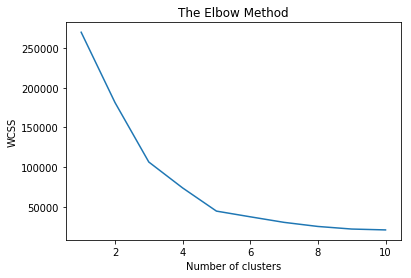

In [22]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [27]:
df_y_kmeans = pd.DataFrame(y_kmeans)
df_y_kmeans.head(1)

,0
0,4


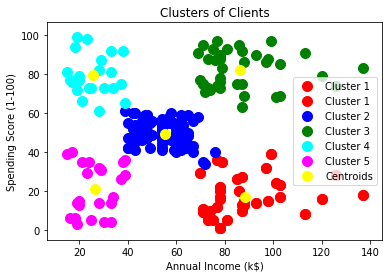

In [30]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans ==0,1], s = 100, c ='red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans ==1,1], s = 100, c ='blue',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans ==2,1], s = 100, c ='green',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans ==3,1], s = 100, c ='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans ==4,1], s = 100, c ='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c ='yellow',label='Centroids')
plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()